# Generatyviniai neuroniniai tinklai

- Generatyviniai adversariniai tinklai (angl. generative adversarial networks, GANs) yra dar viena dirbtinių neuroninių tinklų architektūra, naudojama naujų duomenų (vaizdo, garso) generavimui. 

- Idėja buvo prisatyta 2014 m. mokslininko Ian Goodfellow ir jo kolegų.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/gans_paper.png" alt="gans-paper" width="45%">
<p><strong>7.1 pav., Straipsnis, kuriame pristatyti GANs </strong></p>
</div>

- Iki GAN tinklų atsiradimo generatyviniai modeliai nė neegzistavo. Kai kurie eksperimentai buvo atliekami su autokoderiais, dažnai duodančiais neryškius vaizdus, artefaktus. 

- Bet žmonės jau žinojo, kaip sukurti galingus vaizdų klasifikatorius! 2012 m. pasirodęs *AlexNet* modelis buvo pirmasis modelis, sutriuškinęs savo konkurentus vaizdo klasifikavimo uždaviniuose. 

- Goodfellow idėja buvo, užuot kūrus galingą generatorių, paimti jau egzistuojančio klasifikatoriaus (kurį jis pavadino diskriminatoriumi) architektūrą bei jį panaudoti *apmokant kitą modelį*, atsakingą už naujų duomenų generavimą.

- Pagrindinė GAN inovacija – generatoriaus užduotis ne tiesiogiai sukurti duomenis, panašius į apmokymo aibę (labai sunki užduotis), bet sukurti tokius duomenis, kurie galėtų apgauti diskriminatorių, klasifikuojant juos kaip tikrus.

## Pagrindiniai komponentai

**Generatorius (G)**: Generatoriaus tinklo tikslas - sukurti duomenų pavyzdžius, kurie nesiskirtų nuo tikrų duomenų. Jis pradeda su atsitiktiniu triukšmo vektoriumi ir paverčia jį duomenų pavyzdžiu. Generatoriaus tikslas - sukurti išvestį, kuri būtų kuo artimesnė tikrajam duomenų pasiskirstymui.

**Diskriminatorius (D)**: Diskriminatorius yra binarinis klasifikatorius, kuriuo bandoma atskirti tikruosius duomenų pavyzdžius nuo generatoriaus sukurtų pavyzdžių. Jo įvestis tikras arba sugeneruotas duomenų rinkinio pavyzdys, o išvestis – tikimybė, nurodanti, ar pavyzdys yra klasifikuojamsa kaip tikras, ar kaip netikras.

## Adversarinio mokymosi procesas

- GAN tinklo apmokymas yra minmax optimizavimo uždavinys tarp generatoriaus ir diskriminatoriaus

- Mokymosi pradžioje generatorius pateikia akivaizdžiai netikrus duomenis, todėls diskriminatorius greitai išmoksta nustatyti, kad jie yra netikri

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/gans_1.png" alt="gans-example" width="85%">
</div>

- Tęsiantis mokymosi procesui, generatorius vis labiau artėja prie sugeneruotų duomenų, galinčių apgauti diskriminatorių.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/gans_2.png" alt="gans-example" width="85%">
</div>

- Galiausiai, jei generatoriaus apmokymas pavyksta, diskriminatorius vis prasčiau atskiria tikrą duomenų atvejį nuo netikro. Jis pradeda klasifikuoti netikrus duomenis kaip tikrus, ir jo tikslumas mažėja.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/gans_3.png" alt="gans-example" width="85%">
</div>

- GAN architektūros schema atrodo daugmaž taip:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/gans_architecture.png" alt="gans-architecture" width="80%">
<p><strong>7.2 pav., GAN architektūros schema </strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">


### Netikties funkcija

- Straipsnyje, kuriame pristatyti GANs, netikties funkcija apibrėžiama formule:

$$
L(G, D) = \frac{1}{m} \sum_{i=1}^{m} [\log D(x^{(i)})] + \frac{1}{m} \sum_{i=1}^{m} [\log(1 - D(G(z^{(i)})))] 
$$

- Generatorius ($G$) stengiasi minimizuoti šią funkciją, o diskriminatorius ($D$) stengiasi ją maksimizuoti (nes norime "apgauti" diskriminatorių). Tai yra kiek kitokia optimizavimo forma, nuo mums įprastos $\min_{w} f(w)$:

$$
\min_{G} \max_{D} L(G, D)
$$

> [GAN] is the most exciting idea in the last 10 years in Machine Learning.
> 
> — **Yann LeCun**

## Daugdaros didelio matmens erdvėse

- Kiekvieną vaizdą galime įsivaizduoti kaip tašką didelio matmens erdvėje – kiekvieno pikselio vertė atitinka tašką ant atitinkamos dimensijos ašies. Pvz., turėdami vieno kanalo (*grayscale*) nuotrauką, susidedančią iš 3 pikselių, šių nuotraukų erdvę galime geometriškai pavaizduoti 3D kubu:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/manifold_hypercube.gif" alt="manifold-hypercube" width="65%">
</div>

<hr style="border: none; height: 2px; background-color: black;">


- Tuo tarpu, 256x256 vieno kanalo vaizdą galima pavaizduoti 65 536 matmenų hiperkube.

- Didžioji dauguma tokio hiperkubo taškų yra triukšmingi, beprasmiai vaizdai. Reikšmingi vaizdai, pavyzdžiui, nuotraukos ar parašyti puslapiai, šioje erdvėje pasitaiko itin retai.

- Daugdaros – tai mažesnio matavimo poerdviai aukšto matmens erdvėse, turintys mažiau laisvės laipsnių (t.y. gali būti atvaizduoti į mažesnio matavimo erdves). 

- Manoma, jog prasmingi vaizdai yra išsidėstę mažesnio matmens poerdviuose šioje didelio matmens erdvėje (hiperkube). Pavyzdžiui, vaizdų, kuriuose vaizduojamas žmogaus veidas su skirtingomis išraiškomis, rinkinys yra kažkur „veidų daugdaroje“, kadangi visų tokių nuotraukų pikselių pasiskirstymai turėtų būti bent kiek panašūs. Suradus tokias daugdaras bei judant jomis, galime matyti sklandžiai (tolydžiai) besikeičiančių vaizdų animacijas.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/manifold_transitions.gif" alt="manifold-transitions" width="65%">
</div>

<hr style="border: none; height: 2px; background-color: black;">


- Generatyviniai adversariniai tinklai išmoksta aproksimuoti šias daugdaras. Jie atvaizduoja mažo matmens erdvę (angl. latent space) į didelio matmens vaizdų erdvę, taip išmokdami daugdaros struktūrą. Turint daugdaros aproksimaciją, ją galima panaudoti "vaikštant joje", taip sugeneruojant realistiškai atrodančias nuotraukas, esančias šalia viena kitos (toje *latent space*) bei gaunant gražius netriukšmingus perėjimus.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/drag_gan.gif" alt="drag-gan" width="65%">
</div>

<hr style="border: none; height: 2px; background-color: black;">



- Nors pirmųjų GAN'ų rezultatai nėra labai realistiški, tačiau pasigilinti į jų veikimo principą labai įdomu.

- Straipsnyje *"Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks"* buvo pristatyti pirmieji bandymai išnaudoti *latent space* nuotraukų manipuliavimui. Atliktos įvairios aritmetinės projekcijos su vaizdų reprezentacija *latent* erdvėje, jų rezultatai yra visiškai kitokie, negu atlikus tuos pačius veiksmus *pixel-wise*.

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/gan_stuff.png" alt="gan-on-faces" width="85%">
<p><strong>7.3 pav., Aritmetinės operacijos tarp vaizdų </strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">

- Atliekant interpoliaciją tarp *latent space* vektorių, gaunamos ganėtinai realistiški perėjimai tarp skirtingų vaizdų. 

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/gan_stuff_2.png" alt="gan-on-faces" width="85%">
<p><strong>7.4 pav., Interpoliacija tarp vaizdų </strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">

## Implementacija PyTorch

- Kadangi jau žinote, kaip sukurti puikiai veikiantį klasifikatorių, tereikia jį adaptuoti taip, kad jis atliktų binarinio klasifikavimo uždavinį – prognozuotų, ar duotasis vaizdas yra tikras, ar ne.

- Telieka aprašyti modelį, kuris bus atsakingas už naujų paveikslėlių generavimą.

- Sukursime generatyvinį–adversarinį tinklą (GAN), kuris išmoks generuoti pasirinktos klasės vaizdus. Pritaikysime jį siekiant sugeneruoti dirbtinius skaitmenis iš `MNIST` duomenų rinkinio bei dirbtinius piešinėlius iš `QuickDraw` duomenų rinkinio.

- Progreso saugojimui ir rezultatų vizualizavimui pasinaudosime įrankiu `SummaryWriter` iš `torch.utils.tensorboard`. 

- Treniruoti GAN architektūros modelius labai sudėtinga, dažnai susiduriama su modelio nestabilumais, todėl mūsų implementacija bus paremta straipsniu, kuriame ši architektūra buvo pristatyta [Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks](https://arxiv.org/pdf/1511.06434). Visi hiperparametrai yra paremti straipsnio autorių nustatytomis vertėmis.

### Esminiai aspektai:

1. **Duomenų apdorojimas**
   - Kuomet duomenys paverčiami į tenzorius, vertes reikia normalizuoti tarp intervalo [-1, 1] reikšmių (įprastas normalizavimas yra tarp [0, 1] reikšmių) (pagal straipsnio implementaciją).

2. **GAN Architektūra:**
   - **Generatorius:** Jis bus atsakingas už naujų vaizdų generavimą. Architektūra susideda iš kelių dekonvoliucijos (angl. transposed convolution) sluoksnių (`torch.nn.ConvTranspose2d`), kad iš mažos dimensijos pradinio paveikslėlio (triukšmo) galėtume generuoti vaizdus didindami rezoliuciją, normalizavimo sluoksnių (`torch.nn.BatchNorm2d`), aktyvacijos funkcijos (`torch.nn.ReLU`). *pastaba:* paskutinyje sluoksnyje *batchnorm* nėra naudojama, o aktyvacijos funkcija *relu* pakeičiama į *tanh* (pagal straipsnio implementaciją).
   
   - **Diskriminatorius:** Jis bus naudojamas nustatyti, ar vaizdas yra tikras, ar ne. Architektūra susideda iš kelių konvoliucinių sluoksnių (`torch.nn.Conv2d`), normalizavimo sluoksnių (`torch.nn.BatchNorm2d`), aktyvacijos funkcijos (`torch.nn.LeakyReLU`). *pastaba:* *batchnorm* pirmame sluoksnyje nėra naudojamas; *leaky relu* aktyvacijos funkcijos argumentas 0.2 (pagal straipsnio implementaciją).

   - **Modelių inicializavimas**. Visi modelio svoriai pradžioje inicializuojami iš normalaus pasiskirstymo (su vidurkiu 0 ir standartiniu nuokrypiu 0.02) (pagal straipsnio implementaciją).

3. **Hiperparametrai ir Mokymosi Strategija:**
   - `torch.optim.Adam` optimizatorius bus naudojamas tiek generatoriaus, tiek diskriminatoriaus apmokymui. *pastaba*: optimizatoriaus *learning rate* lygus 0.0002, parametro *beta_1* reikšmė – 0.5 (pagal straipsnio implementaciją).

4. **Mokymo Ciklas:**
   - Kiekvieno mokymo iteracijoje, generatorius generuos vaizdus, kuriuos diskriminatorius įvertins. Generatoriaus tikslas - apgauti diskriminatorių klasifikuojant netikrus vaizdus kaip tikrus.
   - Anksčiau apibrėžtas optimizavimo uždavinys $\min_{G} \max_{D} L(G, D)$ treniravimo žingsnyje atliekamas du kartus – vieną kartą minimizuojant diskriminatoriaus netiktį ir kitą kartą maksimizuojant generatoriaus netikį. Kadangi funkcijos $L(G, D)$ antrasis dėmuo nepriklauso nuo diskriminatoriaus išvesties, šis dėmuo gali būti ignoruojamas. Praktikoje ši netiktis implementuojama atiliekant minimizavimo uždavinį abiem atvejais, pasinaudojant *binary cross entropy* netiktimi. Visa tai užrašoma kaip

   ```
   L_d = BCELoss(D(x), 1) + BCELoss(D(G(z)), 0)
   L_g = BCELoss(D(G(z)), 1)

   ```
   - kintamasis `x` simbolizuoja tikrą vaizdą, kintamasis `z` – atisitiktinai sugeneruotą triukšmo tenzorių, kurį generatorius panaudoja netikro vaizdo sugeneravimui. Treniravimo metu siekiama minimizuoti reikšmes `L_d` ir `L_g`. 

In [2]:
# !pip install quickdraw

In [69]:
import random
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from quickdraw import QuickDrawDataGroup


seed = 999
random.seed(seed)
torch.manual_seed(seed)
torch.use_deterministic_algorithms(True)


def select_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    elif torch.backends.mps.is_available():
        return torch.device('mps')
    else:
        return torch.device('cpu')


def load_quickdraw_data(classes, image_size, val_split=None, max_drawings_per_class=None):
    images = []
    labels = []
    label_dict = {cls: idx for idx, cls in enumerate(classes)}

    for cls in classes:
        qdg = QuickDrawDataGroup(cls, max_drawings=max_drawings_per_class)
        for drawing in qdg.drawings:
            image = drawing.get_image().convert('L')
            image = image.resize(image_size)
            image_array = np.array(image)
            image_array = 255 - image_array
            images.append(image_array)
            labels.append(label_dict[cls])

    X = np.array(images)
    y = np.array(labels)

    if val_split is not None:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_split, stratify=y, random_state=42)
        X, y = (X_train, y_train), (X_val, y_val)

    return X, y

In [78]:
import os
import csv
import matplotlib.pyplot as plt


class Writer:
    def __init__(self, log_dir="logs"):
        self.log_dir = log_dir
        self.scalar_files = {}
        self.writers = {}
        os.makedirs(log_dir, exist_ok=True)

    def add_scalar(self, tag, value, step):
        if tag not in self.scalar_files:
            file_path = os.path.join(self.log_dir, f"{tag}.csv")
            self.scalar_files[tag] = open(file_path, 'w', newline='')
            self.writers[tag] = csv.writer(self.scalar_files[tag])
            self.writers[tag].writerow(['Step', 'Value'])
        self.writers[tag].writerow([step, value])

    def add_image(self, tag, image, step):
        os.makedirs(os.path.join(self.log_dir, tag), exist_ok=True)
        image_path = os.path.join(self.log_dir, f"{tag}/epoch_{step}.png")
        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0).numpy()
        plt.imsave(image_path, image)

    def close(self):
        for file in self.scalar_files.values():
            file.close()

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm2d') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
        

class ConvBlock(nn.Sequential):
    def __init__(self, channels_in, channels_out, activation=True, batch_norm=True, **kwargs):
        layers = [nn.Conv2d(channels_in, channels_out, bias=not batch_norm, **kwargs)]
        layers += [nn.BatchNorm2d(channels_out)] if batch_norm else []
        layers += [nn.LeakyReLU(0.2)] if activation else []
        super().__init__(*layers)
        

class Discriminator(nn.Module):
    def __init__(self, image_size, channels_in, hidden_layers):
        super().__init__()
        self.image_size = image_size
        self.channels_in = channels_in
        self.hidden_layers = hidden_layers
        
        layers = [ConvBlock(channels_in, hidden_layers[0], kernel_size=4, stride=2, padding=1, 
                                 batch_norm=False)]
        layers += [
            ConvBlock(hidden_layers[i], hidden_layers[i+1], kernel_size=4, stride=2, padding=1)
            for i in range(len(hidden_layers) - 1)
        ]
        layers += [ConvBlock(hidden_layers[-1], 1, kernel_size=4, stride=1, padding=0,
                                  batch_norm=False, activation=False)]
        
        self.conv_blocks = nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv_blocks(x)
        x = x.reshape(-1)
        return F.sigmoid(x)
    
    
class DeconvBlock(nn.Sequential):
    def __init__(self, channels_in, channels_out, activation=True, batch_norm=True, **kwargs):
        layers = [nn.ConvTranspose2d(channels_in, channels_out, bias=not batch_norm, **kwargs)]
        layers += [nn.BatchNorm2d(channels_out)] if batch_norm else []
        layers += [nn.ReLU()] if activation else []
        super().__init__(*layers) 
        
        
class Generator(nn.Module):
    def __init__(self, hidden_layers, channels_out, latent_dim):
        super().__init__()
        self.hidden_layers = hidden_layers
        self.channels_out = channels_out
        self.latent_dim = latent_dim
        
        layers = [DeconvBlock(latent_dim, hidden_layers[0], kernel_size=4, stride=1, padding=0)]
        layers += [
            DeconvBlock(hidden_layers[i], hidden_layers[i+1], kernel_size=4, stride=2, padding=1)
            for i in range(len(hidden_layers) - 1)
        ]
        layers += [DeconvBlock(hidden_layers[-1], channels_out, kernel_size=4, stride=2, padding=1,
                                      batch_norm=False, activation=False)]
        
        self.deconv_blocks = nn.Sequential(*layers)
        
    def forward(self, x):
        x = self.deconv_blocks(x)
        return F.tanh(x)

In [79]:
from tqdm import tqdm
from torchvision.utils import make_grid

from datetime import datetime


def train_gan(generator, discriminator, train_loader, optimizer_G, optimizer_D, 
              criterion, device, num_epochs=100, latent_dim=100, log_dir="../logs/"):
    
    timestamp = datetime.now().strftime("%m-%d_%H-%M-%S")
    writer = Writer(log_dir=log_dir + timestamp)

    generator.to(device)
    discriminator.to(device)
    
    num_imgs_to_plot = 8
    fixed_noise = torch.randn(num_imgs_to_plot, latent_dim, 1, 1, device=device)
    
    for epoch in range(num_epochs):
        generator.train()
        discriminator.train()
        
        running_loss_G = running_loss_D = 0.0

        for real_images, _ in tqdm(train_loader, desc=f'Epoch [{epoch+1}/{num_epochs}]', leave=False):
            real_images = real_images.to(device)

            # Train Discriminator

            noise = torch.randn(real_images.size(0), latent_dim, 1, 1, device=device)
            
            disc_real = discriminator(real_images)
            d_loss_real = criterion(disc_real, torch.ones_like(disc_real))
            
            fake_images = generator(noise)
            disc_fake = discriminator(fake_images)
            d_loss_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
            
            d_loss = (d_loss_real + d_loss_fake) / 2
            
            optimizer_D.zero_grad()
            d_loss.backward(retain_graph=True)
            optimizer_D.step()

            running_loss_D += d_loss.item()

            # Train Generator

            output = discriminator(fake_images)
            g_loss = criterion(output, torch.ones_like(output))
            
            optimizer_G.zero_grad()
            g_loss.backward()
            optimizer_G.step()

            running_loss_G += g_loss.item()

        writer.add_scalar('loss_discriminator', running_loss_D / len(train_loader), epoch+1)
        writer.add_scalar('loss_generator', running_loss_G / len(train_loader), epoch+1)
        
        with torch.no_grad():
            fake = generator(fixed_noise)
            
            img_batch = torch.cat((real_images[:num_imgs_to_plot], fake), 0)
            img_grid = make_grid(img_batch, nrow=img_batch.size(0) // 2, normalize=True, value_range=(-1, 1))
                    
            writer.add_image('generated_vs_real', img_grid.cpu(), step=epoch+1)
    
    writer.close()
    
    torch.save({
        'generator_state_dict': generator.state_dict(),
        'discriminator_state_dict': discriminator.state_dict(),
        'optimizer_G_state_dict': optimizer_G.state_dict(),
        'optimizer_D_state_dict': optimizer_D.state_dict(),
        'epoch': num_epochs,
    }, log_dir + timestamp + "/gan_state_dict.pt")


In [39]:
from torch.utils.data import Dataset
import torchvision.transforms as T


class DoodlesDataset(Dataset):
    def __init__(self, data, image_size=None, transform=None):
        
        self.images, self.labels = data
        self.resize = T.Resize(image_size) if image_size else None
        self.to_tensor = T.ToTensor()
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        image = self.to_tensor(image)
        
        if self.resize:
            image = self.resize(image)
            
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[idx]
        
        return image, label

In [76]:
IMAGE_SIZE = (64, 64)
CHANNELS_IN = 1
HIDDEN_LAYERS_D = [16, 32, 64, 128]
HIDDEN_LAYERS_G = [1024, 512, 256, 128]
LATENT_DIM = 100

BATCH_SIZE = 128
CLASSES = [
    "cat",
]

LEARNING_RATE = 0.0002
BETA_1 = 0.5

NUM_EPOCHS = 1

LOG_DIR = '../logs/'

In [74]:
import torchvision.transforms as T
from torch.utils.data import DataLoader

transform = T.Compose([
    T.Normalize((0.5,), (0.5,))
])

train_data = load_quickdraw_data(CLASSES, image_size=(128, 128))
train_dataset = DoodlesDataset(train_data, image_size=IMAGE_SIZE, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

loading cat drawings
load complete


In [77]:
device = select_device()

discriminator = Discriminator(image_size=IMAGE_SIZE, channels_in=CHANNELS_IN, hidden_layers=HIDDEN_LAYERS_D)
discriminator.apply(weights_init)

generator = Generator(hidden_layers=HIDDEN_LAYERS_G, channels_out=CHANNELS_IN, latent_dim=LATENT_DIM)
generator.apply(weights_init)

criterion = nn.BCELoss()
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=LEARNING_RATE, betas=(BETA_1, 0.999))
optimizer_G = torch.optim.Adam(generator.parameters(), lr=LEARNING_RATE, betas=(BETA_1, 0.999))

train_gan(generator, discriminator, train_loader, optimizer_G, optimizer_D, 
          criterion, device, num_epochs=NUM_EPOCHS, latent_dim=LATENT_DIM, log_dir=LOG_DIR)

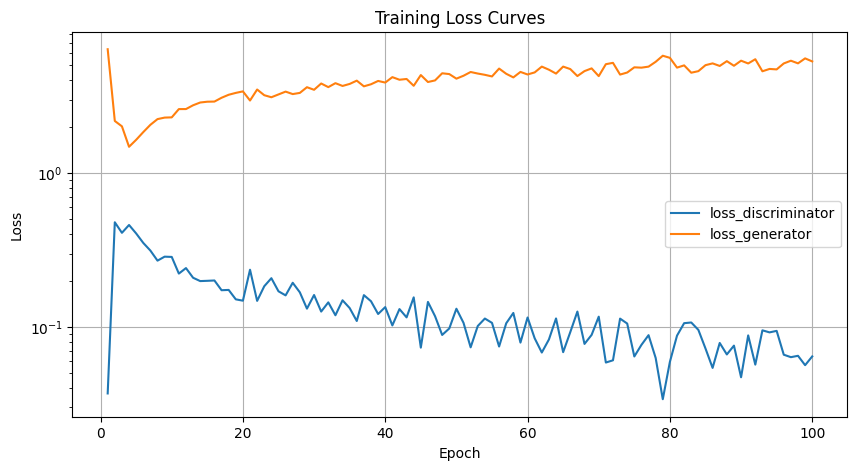

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def plot_loss_curves(log_dir):
    files = [f for f in os.listdir(log_dir) if f.endswith('.csv')]
    plt.figure(figsize=(10, 5))
    
    for file in files:
        data = pd.read_csv(os.path.join(log_dir, file))
        plt.plot(data['Step'], data['Value'], label=file.split('.')[0])
    
    plt.title('Training Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_loss_curves('../logs/09-18_23-00-32')


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, IntSlider

    
def display_images(log_dir):
    image_files = sorted(
        [f for f in os.listdir(log_dir) if f.endswith('.png')],
        key=lambda f: int(f.split('_')[-1].replace('.png', ''))
    )
    def view_image(step):
        img_file = image_files[step-1]
        img_path = os.path.join(log_dir, img_file)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(10, 5))
        plt.imshow(img)
        plt.title(f"Real VS Synthetic Images at Epoch {img_file.split('_')[-1].replace('.png', '')}")
        plt.axis('off')
        plt.show()

    interact(view_image, step=IntSlider(min=1, max=len(image_files), step=1, value=1, description='Epoch'))

display_images('../logs/09-18_23-00-32/generated_vs_real')

<iframe src="https://render-apps-h1wm.onrender.com/gan-progress/" width="100%" height="800px"></iframe>